In [1]:
import matplotlib.pyplot as plt
import numpy
import math
import pandas as pd
df_noHGC = pd.read_csv("results_W2Wp2_4_2p6_rfcut/csv_datasub.csv")
df_HGC = pd.read_csv("results_W2Wp2_4_2p6_withHGC/csv_datasub.csv")
#df_noHGC = df_noHGC[df_noHGC['Wp2_corr']>2.8]
#df_HGC = df_HGC[df_HGC['Wp2_corr']>2.8]
header = 'Q2,xbj_center,xbj_corr,xbj_err,z_center,z_corr,z_corr_err,shmsp,RY,RY_HGC,RY_err,RY_HGC_err\n'
with open('results/csv_HGC.txt','w',encoding='utf-8') as f_sys:
    f_sys.write(header)

In [2]:
df_noHGC.head()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp,Kpi_pos,Kpi_neg
0,4.0,3.37120,0.010452,0.35,0.275,0.278334,0.000075,0.4,0.325,0.344232,...,8.18512,8.75064,9.62620,6.52339,0.272838,0.337434,2.22273,-8.45941,0.012745,0.016173
1,4.0,3.37711,0.007975,0.35,0.275,0.282185,0.000071,0.4,0.375,0.374032,...,52.54530,51.08050,9.47877,6.17125,0.276209,0.365807,2.38765,-1.66717,0.020126,0.016300
2,4.0,3.78953,0.016351,0.35,0.325,0.324555,0.000101,0.4,0.375,0.376633,...,82.79910,80.47860,8.77389,5.71056,0.316530,0.366890,2.34468,-3.43699,0.020792,0.016311
3,4.0,4.20513,0.016609,0.35,0.375,0.371119,0.000095,0.4,0.375,0.380905,...,44.15790,40.26040,8.01342,5.19633,0.360270,0.369741,2.30059,-5.25260,0.013524,0.005322
4,4.0,4.59350,0.011323,0.35,0.425,0.418316,0.000089,0.4,0.375,0.386532,...,11.66470,9.98290,7.27343,4.68011,0.404437,0.374052,2.26259,-6.81788,0.014902,0.005498


xs = df[df['Q2']==4].sort_values('xbj')['xbj'].unique()
print(xs)

In [3]:
df_HGC.head()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp,Kpi_pos,Kpi_neg
0,4.0,3.37120,0.010452,0.35,0.275,0.278334,0.000075,0.4,0.325,0.344232,...,8.18512,8.75064,9.62620,6.52339,0.272838,0.337434,2.22273,-8.45941,0.012745,0.016173
1,4.0,3.37711,0.007975,0.35,0.275,0.282185,0.000071,0.4,0.375,0.374032,...,52.54530,51.08050,9.47877,6.17125,0.276209,0.365807,2.38765,-1.66717,0.020126,0.016300
2,4.0,3.78953,0.016351,0.35,0.325,0.324555,0.000101,0.4,0.375,0.376633,...,82.79910,80.47860,8.77389,5.71056,0.316530,0.366890,2.34468,-3.43699,0.020792,0.016311
3,4.0,4.20513,0.016609,0.35,0.375,0.371119,0.000095,0.4,0.375,0.380905,...,44.15790,40.26040,8.01342,5.19633,0.360270,0.369741,2.30059,-5.25260,0.013524,0.005322
4,4.0,4.59350,0.011323,0.35,0.425,0.418316,0.000089,0.4,0.375,0.386532,...,11.66470,9.98290,7.27343,4.68011,0.404437,0.374052,2.26259,-6.81788,0.014902,0.005498


In [4]:
save_name = 'withcorr'
def Get_kaon_inrfcut(shmsp):
    if shmsp>2.9 :
        return -0.08262502*shmsp**2+0.94821477*shmsp-1.89983972
    else:
        return 0
'''
def Get_pi_purity_HGC(shmsp):
    pi_purity = 1.0
    if shmsp>2.8:
        pi_purity = 1
        #pi_purity = (-0.00156196*shmsp+1.00310863)
    if pi_purity>1:
        pi_purity=1.0
    return 1/pi_purity
'''
def Get_pi_purity_noHGC(posKpiratio,negKpiratio,shmsp):
    negpi_purity = 1
    pospi_purity = 1
    if posKpiratio>0 and negKpiratio>0:
        Kaon_inrfcut = Get_kaon_inrfcut(shmsp)
        pospi_purity = 1-Kaon_inrfcut*posKpiratio
        negpi_purity = 1-Kaon_inrfcut*negKpiratio
        #print(pospi_purity,negpi_purity)
        
    pi_purity = negpi_purity/pospi_purity
    #print(pi_purity)
    return pi_purity


def Get_weighted(values,errs):
    sums = 0
    sig = 0
    for i in range(len(values)):
        for j in range(len(errs)):
            sums+=values[i]/(errs[i]*errs[i])
            sig+=1/(errs[i]*errs[i])
    return sums/sig   
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)
Q2s = [3.80473,4.56863,5.19412]
Q2_str = ["4.000000","4.750000","5.500000"]

[0.35 0.4  0.5  0.45]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/3786018296.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/3786018296.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/3786018296.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/3786018296.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr
circle: noHGC corr,star: withHGC,triangle:noHGC nocorr
circle: noHGC corr,star: withHGC,triangle:noHGC nocorr
circle: noHGC corr,star: withHGC,triangle:noHGC nocorr
circle: noHGC corr,star: withHGC,triangle:noHGC nocorr
circle: noHGC corr,star: withHGC,triangle:noHGC nocorr
circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


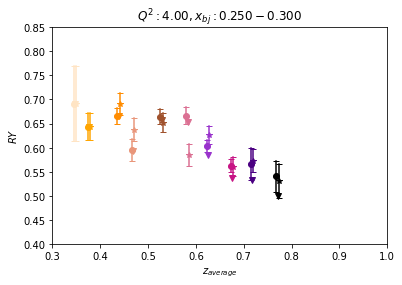

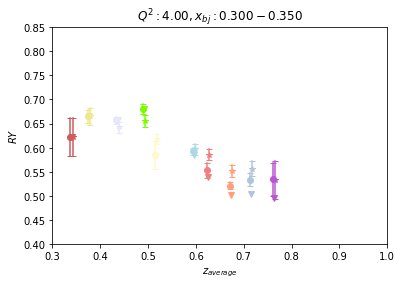

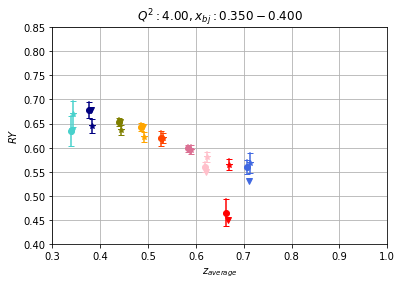

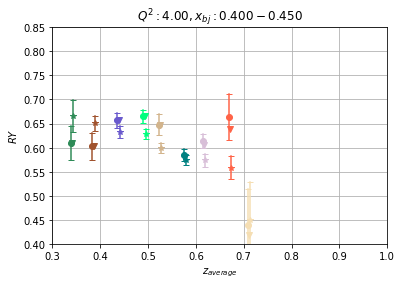

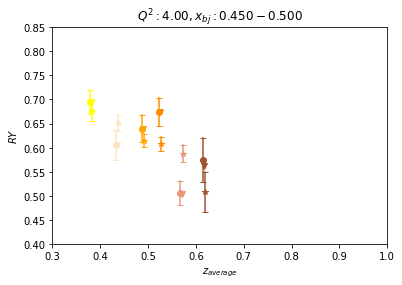

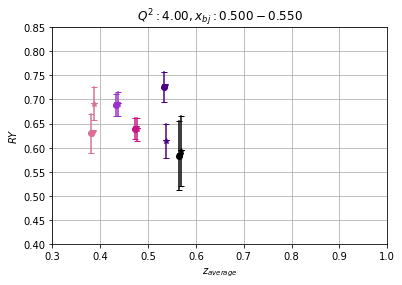

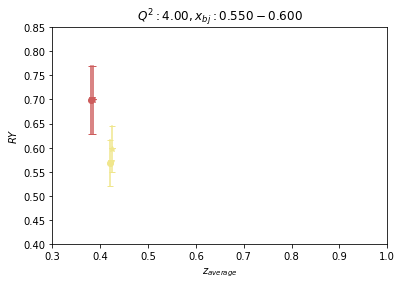

In [5]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']

xs = df_HGC[df_HGC['Q2']==4].sort_values('xbj')['xbj'].unique()
#print(xs)
xbj_set = df_HGC[df_HGC['Q2']==4].sort_values('xbj')['xbj_set'].unique()
print(xbj_set)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_nocorr = []
        RYs_error = []
        RYs_HGC_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        shmsps = []
        shmsps_err = []
        for i,row in df_HGC[df_HGC['Q2']==4][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmspi = row['shms_p']
            shms_dp = row['shms_dp']
            zi_corr = row['z_corr']
            #print(z_corr)
            data_pi_neg = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
            data_pi_pos = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_pos_D2_data'].values[0]
            RYi_noHGC_raw = data_pi_neg/data_pi_pos
            RYs_nocorr.append(RYi_noHGC_raw)
            RYi_error = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['error'].values[0]
            RYs_error.append(RYi_error)

            pos_kpi = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['Kpi_pos'].values[0]
            neg_kpi = df_noHGC[df_noHGC['Q2']==4][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['Kpi_neg'].values[0]
            pi_purity_noHGC = Get_pi_purity_noHGC(pos_kpi,neg_kpi,shmspi)
            #pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            #if shms_dp<-1 or shms_dp>1:
            #    pi_purity_noHGC = 1
            #print(shmsp,pi_purity_noHGC)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw= row['yield_neg_D2_data']/row['yield_pos_D2_data']
            RYi_HGC_error = row['error']
            #pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            #if shms_dp<-1 or shms_dp>1:
            #    pi_purity_HGC = 1
            #RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            RYs_HGC.append(RYi_HGC_raw)
            RYs_HGC_error.append(RYi_HGC_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            shmsps.append(shmspi)
            shmsps_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        shmsp = Get_weighted_average(shmsps,shmsps_err)
        xbj_corr_err = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_HGC_error)
        RY_HGC_err = Get_weighted_sigma(RYs_HGC,RYs_HGC_error)
        RY_nocorr = Get_weighted_average(RYs_nocorr,RYs_error)
        #print('RY_err',RY_err,'RY_HGC_err',RY_HGC_err)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")#",dp{shms_dp}"
        plt.plot(z_corr+0.003,RY_nocorr,"v",color = colors_all[i_col])
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_HGC_err,RY_HGC-RY_HGC_err],marker = "_",color = colors_all[i_col])
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY$')
        plt.xlim(0.3,1)
        plt.ylim(0.4,0.85)
        #plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[0][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
        sys_out = "4.0,"+str(xbj)+","+str(xbj_corr)+","+str(xbj_corr_err)+","+str(iz)+","+str(z_corr)+","+str(z_corr_err)+","+str(shmsp)+","+str(RY)+","+str(RY_HGC)+","+str(RY_err)+","+str(RY_HGC_err)+"\n"
        #sys_out = ['4',str(Q2_corr),str(ix),str(xbj_corr),str(iz),str(z_corr),FF_model[i_FF],str(i_rho)]
        with open('results/csv_HGC.txt','a',encoding='UTF8') as f_sys:
            f_sys.write(sys_out)            
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    print('circle: noHGC corr,star: withHGC,triangle:noHGC nocorr')

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/2346348421.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/2346348421.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/2346348421.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/2346348421.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj

circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr
circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr
circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr
circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr
circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr
circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr
circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr


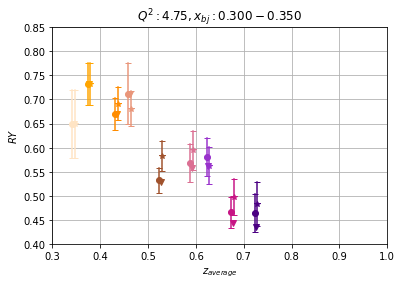

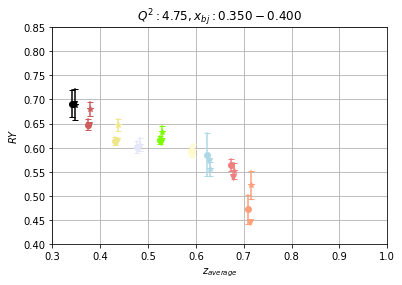

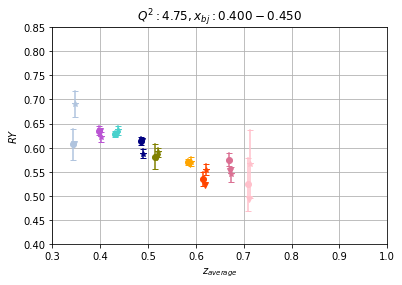

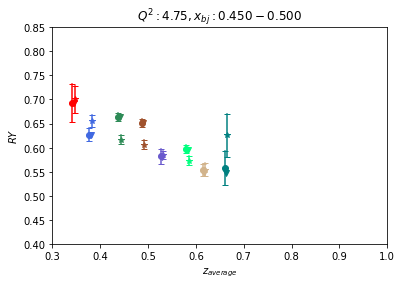

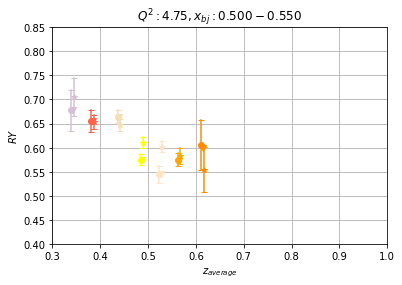

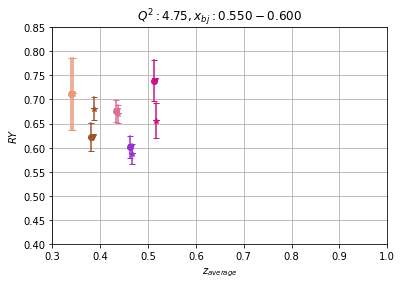

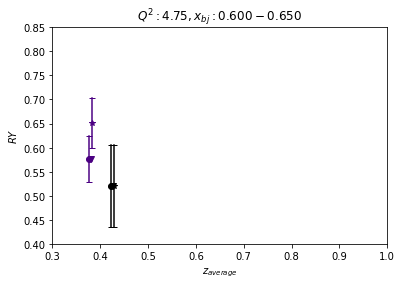

In [6]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']

xs = df_HGC[df_HGC['Q2']==4.75].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_nocorr = []
        RYs_error = []
        RYs_HGC_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        shmsps = []
        shmsps_err = []
        for i,row in df_HGC[df_HGC['Q2']==4.75][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmspi = row['shms_p']
            shms_dp = row['shms_dp']
            zi_corr = row['z_corr']
            #print(z_corr)
            data_pi_neg = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
            data_pi_pos = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_pos_D2_data'].values[0]
            RYi_noHGC_raw = data_pi_neg/data_pi_pos
            RYs_nocorr.append(RYi_noHGC_raw)
            RYi_error = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['error'].values[0]
            RYs_error.append(RYi_error)

            pos_kpi = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['Kpi_pos'].values[0]
            neg_kpi = df_noHGC[df_noHGC['Q2']==4.75][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['Kpi_neg'].values[0]
            pi_purity_noHGC = Get_pi_purity_noHGC(pos_kpi,neg_kpi,shmspi)
            #pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            #if shms_dp<-1 or shms_dp>1:
            #    pi_purity_noHGC = 1
            #print(shmsp,pi_purity_noHGC)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw= row['yield_neg_D2_data']/row['yield_pos_D2_data']
            RYi_HGC_error = row['error']
            #pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            #if shms_dp<-1 or shms_dp>1:
            #    pi_purity_HGC = 1
            #RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            RYs_HGC.append(RYi_HGC_raw)
            RYs_HGC_error.append(RYi_HGC_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            shmsps.append(shmspi)
            shmsps_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        shmsp = Get_weighted_average(shmsps,shmsps_err)
        xbj_corr_err = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        RY_HGC_err = Get_weighted_sigma(RYs_HGC,RYs_HGC_error)
        RY_nocorr = Get_weighted_average(RYs_nocorr,RYs_error)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")#",dp{shms_dp}"
        plt.plot(z_corr+0.003,RY_nocorr,"v",color = colors_all[i_col])
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_HGC_err,RY_HGC-RY_HGC_err],marker = "_",color = colors_all[i_col])
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY$')
        plt.xlim(0.3,1)
        plt.ylim(0.4,0.85)
        #plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[1][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
        sys_out = "4.75,"+str(xbj)+","+str(xbj_corr)+","+str(xbj_corr_err)+","+str(iz)+","+str(z_corr)+","+str(z_corr_err)+","+str(shmsp)+","+str(RY)+","+str(RY_HGC)+","+str(RY_err)+","+str(RY_HGC_err)+"\n"
        #sys_out = ['4',str(Q2_corr),str(ix),str(xbj_corr),str(iz),str(z_corr),FF_model[i_FF],str(i_rho)]
        with open('results/csv_HGC.txt','a',encoding='UTF8') as f_sys:
            f_sys.write(sys_out)            

            
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    print('circle: noHGC corr vary_rf,star: withHGC,fixedrf,triangle:noHGC nocorr')

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/4143360445.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==

circle: noHGC corr,star: withHGC,triangle:noHGC nocorr


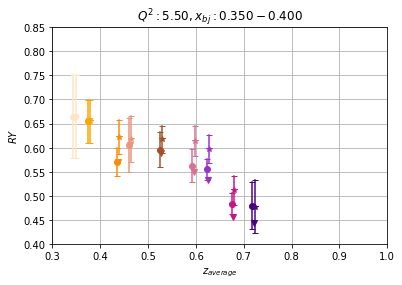

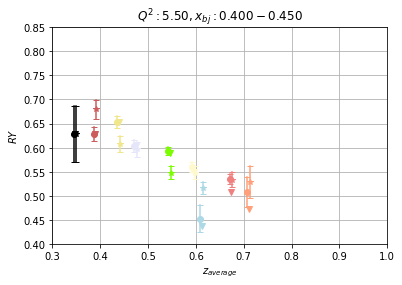

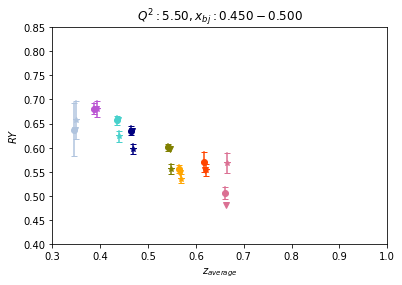

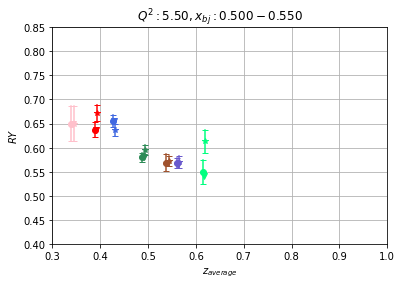

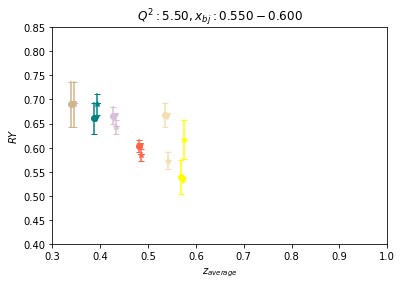

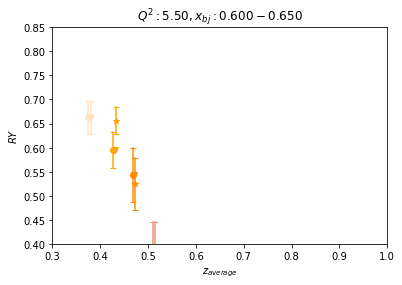

In [7]:
xbj_ones_corr = []
xbj_all_corr=[]
xbj_ones_plot = []
i_col = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','olive','orange','orangered','palevioletred','pink','red','royalblue','seagreen','sienna','slateblue','springgreen','tan','teal','thistle','tomato','wheat','yellow','bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black','indianred','khaki','lavender','lawngreen','lemonchiffon','lightblue','lightcoral','lightsalmon','lightsteelblue','mediumorchid','mediumturquoise','navy','bisque','orange','darkorange','darksalmon','sienna','bisque','orange','darkorange','darksalmon','sienna']

xs = df_HGC[df_HGC['Q2']==5.5].sort_values('xbj')['xbj'].unique()
#print(xs)
#ax.errorbar(xs,zs,RYs,RY_err,marker = "_")
for ix in range(0,len(xs)):
    fig = plt.figure()
    ax = fig.add_subplot()
    xbj_one_corr = []
    xbj_one_err_corr = []
    CSV_one = []
    CSV_one_err = []
    #RY_err = []
    zs = df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]].sort_values('z')['z'].unique()
    #print(zs)
    xbj = xs[ix]
    for iz in zs:
        #print(iRunGroup)
        RYs = []
        RYs_HGC = []
        RYs_nocorr = []
        RYs_error = []
        RYs_HGC_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        shmsps = []
        shmsps_err = []
        for i,row in df_HGC[df_HGC['Q2']==5.5][df_HGC['xbj']==xs[ix]][df_HGC['z']==iz].iterrows():
            shmspi = row['shms_p']
            shms_dp = row['shms_dp']
            zi_corr = row['z_corr']
            #print(z_corr)
            data_pi_neg = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_neg_D2_data'].values[0]
            data_pi_pos = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['yield_pos_D2_data'].values[0]
            RYi_noHGC_raw = data_pi_neg/data_pi_pos
            RYs_nocorr.append(RYi_noHGC_raw)
            RYi_error = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['error'].values[0]
            RYs_error.append(RYi_error)
            
            pos_kpi = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['Kpi_pos'].values[0]
            neg_kpi = df_noHGC[df_noHGC['Q2']==5.5][df_noHGC['xbj']==xs[ix]][df_noHGC['z']==iz]['Kpi_neg'].values[0]
            pi_purity_noHGC = Get_pi_purity_noHGC(pos_kpi,neg_kpi,shmspi)
            #pi_purity_noHGC = Get_pi_purity_noHGC(shmsp)
            #if shms_dp<-1 or shms_dp>1:
            #    pi_purity_noHGC = 1
            #print(shmsp,pi_purity_noHGC)
            RYi_noHGC = RYi_noHGC_raw*pi_purity_noHGC
            RYs.append(RYi_noHGC)
            #print('RYi_noHGC = ',RYi_noHGC)
            RYi_HGC_raw= row['yield_neg_D2_data']/row['yield_pos_D2_data']
            RYi_HGC_error = row['error']
            #pi_purity_HGC = Get_pi_purity_HGC(shmsp)
            #if shms_dp<-1 or shms_dp>1:
            #    pi_purity_HGC = 1
            #RYi_HGC = RYi_HGC_raw*pi_purity_HGC
            RYs_HGC.append(RYi_HGC_raw)
            RYs_HGC_error.append(RYi_HGC_error)
            #print('RY_error ',RY_error)
            zs_corr.append(zi_corr)
            zi_corr_err = row["z_corr_err"]
            zs_corr_err.append(zi_corr_err)
            shmsps.append(shmspi)
            shmsps_err.append(zi_corr_err)
            xbji_corr = row["xbj_corr"]
            xbji_corr_err = row["xbj_corr_err"]
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = row["Q2_corr"]
            Q2i_corr_err = row["Q2_corr_err"]
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
            if Q2i_corr<3:
                print(Q2i_corr)
         
            xbj_ones_corr.append(xbji_corr)
            #print(xbji_corr)
            #ax.plot([z_corr,z_corr],[RY+RY_error,RY-RY_error],marker="_",color = colors[RunGroup//10])
        xbj_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        shmsp = Get_weighted_average(shmsps,shmsps_err)
        xbj_corr_err = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        #print(xbj_corr)
        if abs(xbj_corr-xbj)>0.025:
            print(xbj_corr-xbj)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        Q2_corr = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        if Q2_corr<3:
            print("corr ",Q2_corr)
        #print('RYs ',RYs)
        #print('RYs err ',RYs_error)
        RY = Get_weighted_average(RYs,RYs_error)
        RY_err = Get_weighted_sigma(RYs,RYs_error)
        RY_HGC = Get_weighted_average(RYs_HGC,RYs_error)
        RY_HGC_err = Get_weighted_sigma(RYs_HGC,RYs_HGC_error)
        RY_nocorr = Get_weighted_average(RYs_nocorr,RYs_error)
        #print('RY is ',RY,'RY_HGC is ',RY_HGC)
        ax.plot([z_corr,z_corr],[RY+RY_err,RY-RY_err],color = colors_all[i_col],marker = "_")
        #plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"$Q^2:{Q2_corr:.3f},x_{{bj}}:{xbj_corr:.3f}$")
        plt.plot(z_corr,RY,"o",color = colors_all[i_col],label = f"shmsp{shmsp}")#",dp{shms_dp}"
        plt.plot(z_corr+0.003,RY_nocorr,"v",color = colors_all[i_col])
        ax.plot([z_corr+0.005,z_corr+0.005],[RY_HGC+RY_HGC_err,RY_HGC-RY_HGC_err],marker = "_",color = colors_all[i_col])
        plt.plot(z_corr+0.005,RY_HGC,"*",color = colors_all[i_col])
        xbj_all_corr.append(xbj_corr)
        xbj_one_corr.append(xbj_corr)
        xbj_onei_err_corr = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_one_err_corr.append(xbj_onei_err_corr)
        plt.xlabel(r'$z_{average}$')
        plt.ylabel(r'$RY$')
        plt.xlim(0.3,1)
        plt.ylim(0.4,0.85)
        #plt.legend()
        plt.grid()
        ax.set_title(f"$Q^2:{Q2_str[2][0:4]},x_{{bj}}:{(xbj-0.025):.3f}-{(xbj+0.025):.3f}$")#str(xbj-0.025)[0:5]+"-"+str(xbj+0.025)[0:5])
        i_col = i_col+1
        sys_out = "5.5,"+str(xbj)+","+str(xbj_corr)+","+str(xbj_corr_err)+","+str(iz)+","+str(z_corr)+","+str(z_corr_err)+","+str(shmsp)+","+str(RY)+","+str(RY_HGC)+","+str(RY_err)+","+str(RY_HGC_err)+"\n"
        #sys_out = ['4',str(Q2_corr),str(ix),str(xbj_corr),str(iz),str(z_corr),FF_model[i_FF],str(i_rho)]
        with open('results/csv_HGC.txt','a',encoding='UTF8') as f_sys:
            f_sys.write(sys_out)            

   
    xbj_one = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    xbj_ones_plot.append(xbj_one)
    xbj_one_err = Get_weighted_average(xbj_one_corr,xbj_one_err_corr)
    print('circle: noHGC corr,star: withHGC,triangle:noHGC nocorr')
    plt.savefig('notebook_results/RY_compare_'+str(xbj_one)+'.pdf')
        

[0.275 0.325 0.375 0.425]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575]
[0.275 0.325 0.375 0.425 0.475 0.525]
[0.275 0.325 0.375 0.425 0.475 0.525]
[0.275 0.325 0.375 0.425 0.475 0.525]
[0.275 0.325 0.375 0.425 0.475]
[0.275 0.325 0.375 0.425]
[0.275 0.325 0.375 0.425]
[0.275 0.325]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/87863005.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df_diff[df_diff['Q2']==4][df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/87863005.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_diff[df_diff['Q2']==4][df_diff['z_center'] == iz].iterrows():


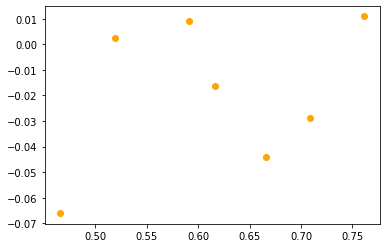

In [8]:
import numpy as np
df_diff = pd.read_csv("results/csv_HGC.txt")
zs = df_diff[df_diff['Q2']==4].sort_values('z_center')['z_center'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(zs)
for iz in zs:
    xs = df_diff[df_diff['Q2']==4][df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
    print(xs)
    RYs = []
    RY_HGCs = []
    RY_errs = []
    RY_HGC_errs = []
    zs = []
    zs_err = []
    for i,row in df_diff[df_diff['Q2']==4][df_diff['z_center'] == iz].iterrows():
        RYi = row['RY']
        RYi_HGC = row['RY_HGC']
        RYi_err = row['RY_err']
        RYi_HGC_err = row['RY_HGC_err']
        shmspi = row['shmsp']
        zi = row['z_corr']
        zi_err = row['z_corr_err']
        if(shmspi>2.9):
            RYs.append(RYi)
            RY_HGCs.append(RYi_HGC)
            RY_errs.append(RYi_err)
            RY_HGC_errs.append(RYi_HGC_err)
            zs.append(zi)
            zs_err.append(zi_err)
    if len(RYs)>0:
        #print(RYs)
        #print(RY_HGCs)
        RY = Get_weighted_average(RYs,RY_errs)
        RY_HGC = Get_weighted_average(RY_HGCs,RY_errs)
        RY_err = Get_weighted_sigma(RYs,RY_errs)
        RY_HGC_err = Get_weighted_sigma(RY_HGCs,RY_HGC_errs)
        z_corr = Get_weighted_average(zs,zs_err)
        dRY = (RY-RY_HGC)/RY_HGC
        dRY_err = dRY*(RY_err**2/RY**2+RY_HGC_err**2/RY_HGC**2)
        ax.plot([z_corr,z_corr],[dRY+dRY_err,dRY-dRY_err],color = "orange",marker = "_")
        plt.plot(z_corr,dRY,"o",color = "orange")#",dp{shms_dp}"


    
  

[0.325 0.375 0.425 0.475 0.525 0.575]
[0.325 0.375 0.425 0.475 0.525 0.575 0.625]
[0.325 0.375 0.425 0.475 0.525 0.575 0.625]
[0.325 0.375 0.425 0.475 0.525 0.575]
[0.325 0.375 0.425 0.475 0.525 0.575]
[0.325 0.375 0.425 0.475 0.525]
[0.325 0.375 0.425 0.475 0.525]
[0.325 0.375 0.425 0.475]
[0.325 0.375 0.425]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/2148906658.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df_diff[df_diff['Q2']==4.75][df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/2148906658.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_diff[df_diff['Q2']==4.75][df_diff['z_center'] == iz].iterrows():


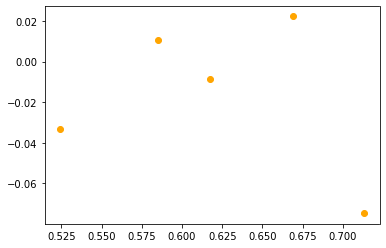

In [9]:
import numpy as np
df_diff = pd.read_csv("results/csv_HGC.txt")
zs = df_diff[df_diff['Q2']==4.75].sort_values('z_center')['z_center'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(zs)
for iz in zs:
    xs = df_diff[df_diff['Q2']==4.75][df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
    print(xs)
    RYs = []
    RY_HGCs = []
    RY_errs = []
    RY_HGC_errs = []
    zs = []
    zs_err = []
    for i,row in df_diff[df_diff['Q2']==4.75][df_diff['z_center'] == iz].iterrows():
        RYi = row['RY']
        RYi_HGC = row['RY_HGC']
        RYi_err = row['RY_err']
        RYi_HGC_err = row['RY_HGC_err']
        shmspi = row['shmsp']
        zi = row['z_corr']
        zi_err = row['z_corr_err']
        if(shmspi>2.9):
            RYs.append(RYi)
            RY_HGCs.append(RYi_HGC)
            RY_errs.append(RYi_err)
            RY_HGC_errs.append(RYi_HGC_err)
            zs.append(zi)
            zs_err.append(zi_err)
    if len(RYs)>0:
        #print(RYs)
        #print(RY_HGCs)
        RY = Get_weighted_average(RYs,RY_errs)
        RY_HGC = Get_weighted_average(RY_HGCs,RY_errs)
        RY_err = Get_weighted_sigma(RYs,RY_errs)
        RY_HGC_err = Get_weighted_sigma(RY_HGCs,RY_HGC_errs)
        z_corr = Get_weighted_average(zs,zs_err)
        dRY = (RY-RY_HGC)/RY_HGC
        dRY_err = dRY*(RY_err**2/RY**2+RY_HGC_err**2/RY_HGC**2)
        ax.plot([z_corr,z_corr],[dRY+dRY_err,dRY-dRY_err],color = "orange",marker = "_")
        plt.plot(z_corr,dRY,"o",color = "orange")#",dp{shms_dp}"


    
  

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/1254626514.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xs = df_diff[df_diff['Q2']==5.5][df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15776/1254626514.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df_diff[df_diff['Q2']==5.5][df_diff['z_center'] == iz].iterrows():


[0.375 0.425 0.475 0.525 0.575]
[0.375 0.425 0.475 0.525 0.575 0.625]
[0.375 0.425 0.475 0.525 0.575 0.625]
[0.375 0.425 0.475 0.525 0.575 0.625]
[0.375 0.425 0.475 0.525 0.575 0.625]
[0.375 0.425 0.475 0.525 0.575]
[0.375 0.425 0.475 0.525]
[0.375 0.425 0.475]
[0.375 0.425]


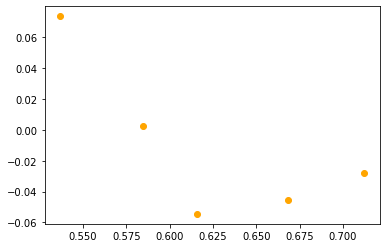

In [10]:
import numpy as np
df_diff = pd.read_csv("results/csv_HGC.txt")
zs = df_diff[df_diff['Q2']==5.5].sort_values('z_center')['z_center'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(zs)
for iz in zs:
    xs = df_diff[df_diff['Q2']==5.5][df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
    print(xs)
    RYs = []
    RY_HGCs = []
    RY_errs = []
    RY_HGC_errs = []
    zs = []
    zs_err = []
    for i,row in df_diff[df_diff['Q2']==5.5][df_diff['z_center'] == iz].iterrows():
        RYi = row['RY']
        RYi_HGC = row['RY_HGC']
        RYi_err = row['RY_err']
        RYi_HGC_err = row['RY_HGC_err']
        shmspi = row['shmsp']
        zi = row['z_corr']
        zi_err = row['z_corr_err']
        if(shmspi>2.9):
            RYs.append(RYi)
            RY_HGCs.append(RYi_HGC)
            RY_errs.append(RYi_err)
            RY_HGC_errs.append(RYi_HGC_err)
            zs.append(zi)
            zs_err.append(zi_err)
    if len(RYs)>0:
        #print(RYs)
        #print(RY_HGCs)
        RY = Get_weighted_average(RYs,RY_errs)
        RY_HGC = Get_weighted_average(RY_HGCs,RY_errs)
        RY_err = Get_weighted_sigma(RYs,RY_errs)
        RY_HGC_err = Get_weighted_sigma(RY_HGCs,RY_HGC_errs)
        z_corr = Get_weighted_average(zs,zs_err)
        dRY = (RY-RY_HGC)/RY_HGC
        dRY_err = dRY*(RY_err**2/RY**2+RY_HGC_err**2/RY_HGC**2)
        ax.plot([z_corr,z_corr],[dRY+dRY_err,dRY-dRY_err],color = "orange",marker = "_")
        plt.plot(z_corr,dRY,"o",color = "orange")#",dp{shms_dp}"


    
  

[0.275 0.325 0.375 0.425 0.475 0.525 0.575]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575 0.625]
[0.275 0.325 0.375 0.425 0.475 0.525 0.575]
[0.275 0.325 0.375 0.425 0.475 0.525]
[0.275 0.325 0.375 0.425 0.475]
[0.275 0.325 0.375 0.425]
[0.275 0.325]


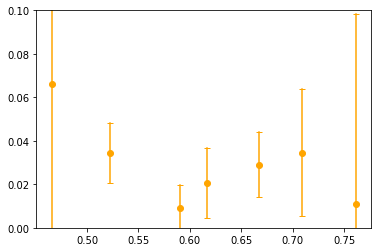

In [20]:
import numpy as np
df_diff = pd.read_csv("results/csv_HGC.txt")
zs = df_diff.sort_values('z_center')['z_center'].unique()
fig = plt.figure()
ax = fig.add_subplot()
#print(zs)
for iz in zs:
    xs = df_diff[df_diff['z_center'] == iz].sort_values('xbj_center')['xbj_center'].unique()
    print(xs)
    RYs = []
    RY_HGCs = []
    RY_errs = []
    RY_HGC_errs = []
    zs = []
    zs_err = []
    for i,row in df_diff[df_diff['z_center'] == iz].iterrows():
        RYi = row['RY']
        RYi_HGC = row['RY_HGC']
        RYi_err = row['RY_err']
        RYi_HGC_err = row['RY_HGC_err']
        shmspi = row['shmsp']
        zi = row['z_corr']
        zi_err = row['z_corr_err']
        if(shmspi>2.9):
            RYs.append(RYi)
            RY_HGCs.append(RYi_HGC)
            RY_errs.append(RYi_err)
            RY_HGC_errs.append(RYi_HGC_err)
            zs.append(zi)
            zs_err.append(zi_err)
    if len(RYs)>0:
        #print(RYs)
        #print(RY_HGCs)
        RY = Get_weighted_average(RYs,RY_errs)
        RY_HGC = Get_weighted_average(RY_HGCs,RY_errs)
        RY_err = Get_weighted_sigma(RYs,RY_errs)
        RY_HGC_err = Get_weighted_sigma(RY_HGCs,RY_HGC_errs)
        z_corr = Get_weighted_average(zs,zs_err)
        dRY = abs(RY-RY_HGC)/RY_HGC
        dRY_err = 2*RY_err/RY_HGC#dRY*math.sqrt(RY_err**2/RY**2+RY_HGC_err**2/RY_HGC**2)
        ax.plot([z_corr,z_corr],[dRY+dRY_err,dRY-dRY_err],color = "orange",marker = "_")
        plt.plot(z_corr,dRY,"o",color = "orange")#",dp{shms_dp}"
plt.ylim(0,0.1)
plt.savefig('results/PID_sys.pdf')
    
  